# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


# References

- Grus, J. (2019). Data science from scratch : First principles with python. O'Reilly Media, Incorporated.
- seaborn.pydata.org. (n.d.). Example gallery — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/examples/index.html.
- Scikit-learn.org. (2017). API Reference — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/classes.html.
- Stack Overflow. (n.d.). python - How can the Euclidean distance be calculated with NumPy? [online] Available at: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy [Accessed 16 Dec. 2021].

## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [48]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import random

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arraysW of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

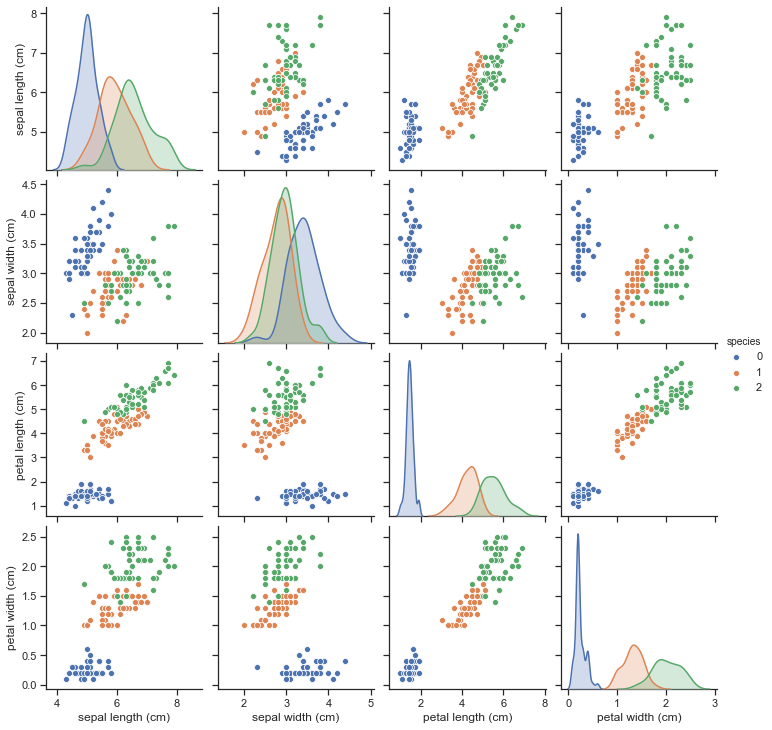

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [49]:
# define plotting function
def myplotGrid(X:np.ndarray, y:np.ndarray, features:list, target:str='class', diag_kind:str='kde') -> None:
    """
    Plot a grid of the interaction between features.

    Parameters
    ----------
    X : ndarray
        The independent (predictory) variables to plot interactions for.
    y : ndarray
        The one dimensional array containing the values of the dependant (target) variable.
    features : list
        The feature names of the independent variables in `X`.
    target : str, optional
        The display name of the target variable.
    diag_kind : {'auto', 'hist', 'kde', None}, optional
        Kind of plot for the diagonal subplots.
    """
    # create a dataframe that can be processed by the seaborne library
    data = pd.DataFrame(X, columns=features)    # create the dataframe from the independent variables
    data[target] = y                            # add the dependant variable to the dataframe

    # use the seaborne library to create a pairplot
    sns.set_theme(style="ticks")
    sns.pairplot(data=data, hue=target, palette='pastel', diag_kind=diag_kind)

#myplotGrid(X, y, selected_features, diag_kind='hist')

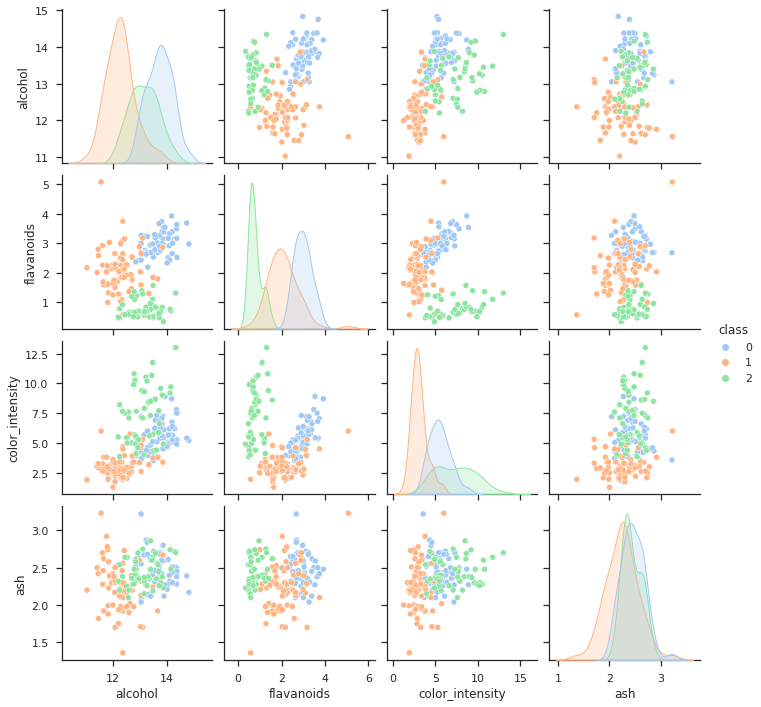

In [50]:
# run the plotting function
myplotGrid(X, y, selected_features)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

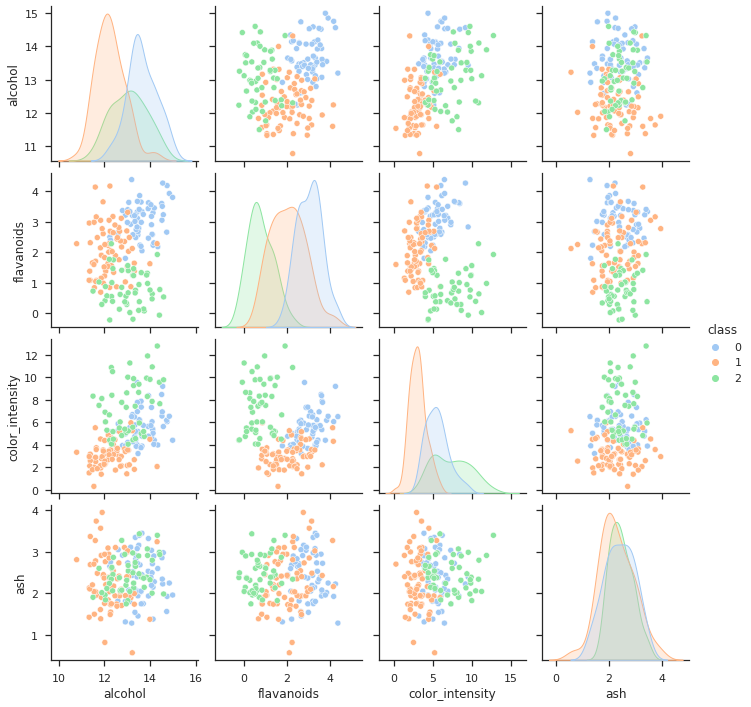

In [51]:
# initialize random seed to replicate results over different runs
mySeed = 12345
np.random.seed(mySeed) 
XN = X + np.random.normal(0,0.5, X.shape)

# plot the noisy data for comparison with the original pairplot
myplotGrid(XN, y, selected_features)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


**answer:**
A visual examination of the pair plot of the data without noise shows fairly good separation between the three classes for the following pairs:
- alcohol and flavanoids
- alcohol and color_intensity
- flavanoids and color_intensity

The `ash` feature in combination with any of the other features does not show such clean separation. When looking at the `ash` feature the distribution of the three classes are are also very similar.

The plot with noise added to the features reveals the same pattern. It is very difficult to judge based on just looking at the two plots visually, but it seems that perhaps the following pair shows the best class separation in both plots:

`flavanoids` and `color_intensity`


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


**answer:** The most apparent observation is that the separation between the classes becomes less clear. Along with this the distributions change slightly, both both these changes are to be expected with the introduction of noise. In  practice this will mean that we can expect the predictive power of the model to decrease the more noisy the data is.



## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [52]:
# use a library that implements AutoML to create an optimized model for comparison
from pycaret.classification import *

data = pd.DataFrame(X, columns=selected_features)
data['target'] = y

clf = setup(data=data, target='target', silent=True, verbose=False, session_id=4)
model = create_model('knn', algorithm='brute')
tuned_model = tune_model(model)
final_model = finalize_model(tuned_model)

print(final_model)
#plot_model(tuned_model, 'feature')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,1.0000,0.8667,0.8782,0.8359,0.7679,0.7890
1,0.9231,1.0000,0.9444,0.9385,0.9239,0.8818,0.8899
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9167,1.0000,0.9333,0.9333,0.9167,0.8737,0.8830
5,0.8333,0.9881,0.8222,0.8500,0.8296,0.7419,0.7502
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,1.0000,0.9333,0.9333,0.9167,0.8737,0.8830
8,0.8333,0.9033,0.8222,0.8500,0.8296,0.7419,0.7502
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')


In [53]:
# helper code

class Distance():
    """
    This class implements the functionality to calculate the distance between two vectors.
    """
    def __init__(self, distance_type='euclidean'):
        """
        Initialize the class.

        distance_type : {'euclidean','manhattan'}, optional
            The method to use when performing distance calculations.   
        """
        self.distance_type = distance_type

    def distance(self, a:np.ndarray, b:np.ndarray) -> float:
        """
        Calculate the distance between 'a' and 'b'. If the class was not instanciated with the distance type of 'manhattan' the Euclidean distance formula will be used.
        """
        if self.distance_type == 'euclidean':
            return self.euclidean(a, b)
        elif self.distance_type == 'manhattan':
            return self.manhattan(a, b)
        else:
            raise Exception('%s is not a valid distance type.' % self.distance_type)

    def euclidean(self, a:np.ndarray, b:np.ndarray) -> float:
        """
        Calculate the Euclidean distance between 'a' and 'b'.
        
        Parameters
        ----------
        a : ndarray
        b : ndarray

        Returns
        -------
        float
        """
        return np.linalg.norm(a-b)

    def manhattan(self, a:np.ndarray, b:np.ndarray) -> float:
        """
        Calculate the Manhattan distance between 'a' and 'b'.
        
        Parameters
        ----------
        a : ndarray
        b : ndarray

        Returns
        -------
        float
        """
        return np.linalg.norm(a-b, 1)

# test the distance class
from scipy.spatial import distance

dist = Distance()
np.random.seed(15)
for i in range(0, 10000):
    a = np.random.rand(4, )
    b = np.random.rand(4)

    # euclidean test
    assert round(dist.euclidean(a, b), 10) == round(distance.euclidean(a, b), 10)

    # manhattan test
    assert round(dist.manhattan(a, b), 10) == round(distance.cityblock(a, b), 10)

In [54]:
    from typing import NamedTuple

    class LabeledPoint(NamedTuple):
        """
        A representation of a data point and its assigned label.

        Attributes
        ----------
        point : ndarray
            A vector containing the feature values for the data point.
        label : str
            The label assigned to the datapoint.
        """            
        point: np.ndarray
        label: str


In [55]:
class KNeighborsClassifier():
    """
    An implementation of the k-nearest neighbors vote classification algorithm.

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use.
    metric : {'euclidean','manhattan'}, default='euclidean'
        the distance metric to use.
    """
    def __init__(self, n_neighbors:int=5, metric:str='euclidean'):
        self.n_neighbors = n_neighbors
        self.distance = Distance(distance_type=metric)
        self.labeled_points = []

    def fit(self, X, y) -> None:
        """
        Fit the model using X as training data and y as target values

        Parameters
        ----------
        X : ndarray
            Training data. 
        y : ndarray
            Target values.
        """
        for i, dataPoint in enumerate(X):
            self.labeled_points.append(
                LabeledPoint(dataPoint, y[i]))

    def classify(self, x) -> str:
        """
        Predict the class label for a single data point

        Parameters
        ----------
        X : ndarray

        Returns
        -------
        y : str
            Class label for the data point.        
        """
        # sort the fitted data by distance from the data point to classify
        by_distance =sorted(
            self.labeled_points, 
            key=lambda labeled_point : self.distance.distance(labeled_point.point, x))

        # find the data points of the nearest neighbors
        nearest_labels = [labeled_point.label for labeled_point in by_distance[:self.n_neighbors]]

        # count the label frequencies
        label_counts = np.bincount(nearest_labels)
        #print(nearest_labels)
        #print(label_counts)

        # return the predicted label (the label with the highest frequency in the neighboring data points)
        return np.argmax(label_counts)

    def predict(self, X) -> np.ndarray:
        """
        Predict the class labels for the provided data.

        Parameters
        ----------
        X : ndarray

        Returns
        -------
        y : ndarray
            Class labels for each data sample.
        """
        predicted=[]

        for dataPoint in X:
            predicted.append(self.classify(dataPoint))

        return np.array(predicted)

# test the knn class
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X[:124], y[:124])

#inx = 126
#print(y[inx])
#knn.classify(X[inx])

#print(y[125:])
knn.predict(X[125:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [56]:
# mykNN code
def mykNN(X, y, X_, n_neighbors:int=5, metric:str='euclidean') -> np.ndarray:
    """
    Perform class prediction using the KNN algorithm.

    Parameters
    ----------
    X : ndarray
        Training data. 
    y : ndarray
        Target values. 
    X_ : ndarray
        The data points for which to predict class labels.
    n_neighbors : int, default=5
        Number of neighbors to use.
    metric : {'euclidean','manhattan'}, default='euclidean'
        the distance metric to use.

    Returns
    -------
    y_ : ndarray
        Class labels for each data sample.
    """
    # create the  knn classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

    # fit the training data points
    knn.fit(X, y)

    # predict and return the class labels
    return knn.predict(X_)

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [92]:
def train_test_split(X:np.ndarray, y:np.ndarray, test_size:float, random_state:int=None) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Split arrays into random train and test subsets

    Parameters
    ----------
    X : ndarray
        An array of the independent variables vectors. 
    y : ndarray
        An array of the target values for each vector in `X`.
    test_size : float
        Should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
    random_state : int, default=None
        Pass a value for reproducible output across multiple function calls.         

    Returns
    -------
    X_train : ndarray
    X_test : ndarray
    y_train : ndarray
    y_test : ndarray   
    """
    # set the random seed if a value was passed
    if random_state:
        random.seed(random_state)

    # create a random index to perform the split on
    index = np.arange(len(X))
    random.shuffle(index)
    
    # re-index the X and y arrays
    X = X[index]
    y = y[index]

    # calculate the cut point to split at in the index
    cut = int(len(index) * (1 - test_size))

    # return the split data
    return (
        np.array(X[:cut]),
        np.array(X[cut:]),
        np.array(y[:cut]),
        np.array(y[cut:]))
        
# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#print(len(X), len(X_train), len(y_test))

# predict values for test data based on training data
y_pred = mykNN(X_train, y_train, X_test, n_neighbors=2)
#y_pred

In [116]:
# confusion matrix, accuracy, precision, recall, etc. 
def confusion_matrix(y_true:np.ndarray, y_pred:np.ndarray) -> np.ndarray:
    """
    Create an array with the confusion matrix obtained by comparing the true lables with the predicted label.

    Parameters
    ----------
    y_true : ndarray of shape (n_samples)
        Actual target values.

    y_pred : ndarray of shape (n_samples)
        Predicted target values.    

    Returns
    -------
    cm : ndarray of shape (n_classes, n_classes)
        The confusion matrix.     
    """
    # get a list of the unique values
    labels = np.unique(np.concatenate((y_true, y_pred)))

    # create the empty confusion matrix
    cm = np.zeros((len(labels), len(labels)), dtype=np.int)

    # populate the confusion matrix
    for i, actual in enumerate(y_true):
        cm[actual, y_pred[i]] += 1

    return cm

confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 2, 20,  0],
       [ 0,  1, 15]])

In [98]:
from sklearn.metrics import confusion_matrix as cm
cm(y_test,y_pred)

array([[16,  0,  0],
       [ 2, 20,  0],
       [ 0,  1, 15]])

In [122]:
def accuracy_score(y_true, y_pred):
    """
    Calculate the accuracy score of the predicted values.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples)
        Actual target values.

    y_pred : ndarray of shape (n_samples)
        Predicted target values.    

    Returns
    -------
    accuracy : float        
    """
    return np.sum(np.where(y_test - y_pred == 0, 1, 0)) / len(y_test)

accuracy_score(y_test, y_pred)

0.9444444444444444

In [121]:
# use the sklearn function for comparison
from sklearn.metrics import accuracy_score as acc_score
acc_score(y_test, y_pred)

0.9444444444444444

In [151]:
def precision_score(y_true, y_pred) -> np.ndarray:
    """
    Calculate the precision score for each of the target values.

    Parameters
    ----------
    y_true : ndarray of shape (n_samples)
        Actual target values.

    y_pred : ndarray of shape (n_samples)
        Predicted target values. 
        
    Returns
    -------
    precision : np.ndarray               
    """
    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # create the precision array
    precision = np.zeros(cm.shape[0])

    # calculate the precision for each target value
    row_sum = np.sum(cm, axis=1)
    col_sum = np.sum(cm, axis=0)

    for i in range(0, cm.shape[0]):
        # get the true positive and false positive values
        tp = cm[i, i]
        fp = col_sum[i] - tp

        # calculate the precision for the current label
        precision[i] =  tp / (tp + fp)

    # return the results
    return precision

# test the implementation
precision_score(y_test, y_pred)

array([0.88888889, 0.95238095, 1.        ])

In [147]:
# use the sklearn function for comparison
from sklearn.metrics import precision_score  as pre_score
pre_score(y_test, y_pred, average=None)

array([0.88888889, 0.95238095, 1.        ])

In [154]:
def recall_score(y_true, y_pred) -> np.ndarray:
    """
    Calculate the recall score for each of the target values.

    Parameters
    ----------
    y_true : ndarray of shape (n_samples)
        Actual target values.

    y_pred : ndarray of shape (n_samples)
        Predicted target values. 
        
    Returns
    -------
    recall : np.ndarray               
    """
    # get the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # create the recall array
    recall = np.zeros(cm.shape[0])

    # calculate the precision for each target value
    row_sum = np.sum(cm, axis=1)
    col_sum = np.sum(cm, axis=0)

    for i in range(0, cm.shape[0]):
        # get the true positive and false negative values
        tp = cm[i, i]
        fn = row_sum[i] - tp

        # calculate the precision for the current label
        recall[i] =  tp / (tp + fn)

    # return the results
    return recall

# test the implementation
recall_score(y_test, y_pred)

array([1.        , 0.90909091, 0.9375    ])

In [150]:
# use the sklearn function for comparison
from sklearn.metrics import recall_score  as rec_score
rec_score(y_test, y_pred, average=None)

array([1.        , 0.90909091, 0.9375    ])

### Compare with sklearn

Compare the custom model validatin functions with the corresponing functions from the Scikit-learn library. 

#### Custom Functions

In [162]:
# test evaluation code
print('classes:      %s' % np.unique(y_pred))
print('my accuracy:  %.3f' % accuracy_score(y_test, y_pred))   
print('my precision: %s' % precision_score(y_test, y_pred))
print('my recall:    %s' % recall_score(y_test, y_pred))

classes:      [0 1 2]
my accuracy:  0.944
my precision: [0.88888889 0.95238095 1.        ]
my recall:    [1.         0.90909091 0.9375    ]


#### Scikit-learn Functions

In [165]:
print('library accuracy:  %.3f' % acc_score(y_test, y_pred))   
print('library precision: %s' % pre_score(y_test, y_pred, average=None))
print('library recall:    %s' % rec_score(y_test, y_pred, average=None))

library accuracy:  0.944
library precision: [0.88888889 0.95238095 1.        ]
library recall:    [1.         0.90909091 0.9375    ]



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [60]:
# parameters for testing code
nFolds = 5
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)


In [61]:
# myNestedCrossVal code

for iFold in range(0,nFolds):
    testFold = indices[iFold]
    print('new iterration')
    
    remaining_folds = np.delete(range(0,nFolds), iFold)
    validationFold = indices[ remaining_folds[0] ]


new iterration
new iterration
new iterration
new iterration
new iterration


In [62]:
# evaluate clean data code


In [63]:
# evaluate noisy  data code


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [64]:
print('CLEAN')
# clean data summary results



print('NOISY')
# clean data summary results


CLEAN
NOISY


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:


### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:



### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

